# 07. 군집화

## 01 K-평균 알고리즘 이해

#### K-평균
: 군집 중심점(centriod)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법
- 군집화(clustering)에서 가장 일반적인 알고리즘

##### 군집 중심점
: 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다이 중심점을 평균 지점으로 이동하는 프로세스 반복<br> *자세한 step은 p410 참고*
 ![im1](https://blog.kakaocdn.net/dn/IzYb3/btqyWWJ6pRR/fLbSvEKc7ncHp18dMLtcIK/img.png)

##### K평균 장점
- 일반적인 군집화에서 가장 많이 활용
- 알고리즘이 쉽고 간결

##### K평균 단점
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐 *(PCA 차원 감소 적용하여 해결)
- 반복 횟수가 많을 수록 수행 시간이 많이 걸림(매우 느려짐)
- 몇 개의 군집을 선택해야 할지 가이드하기 어려움

### 사이킷런 KMeans 클래스 소개

#### 초기화 파라미터
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html<br>
class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')

##### 중요 파라미터
- n_clusters: 군집화 할 개수; 군집 중심점의 개수 의미
- init: 초기 군집 중심점의 좌표를 설정할 방식; 일반적으로 k-means++방식으로 최초 설정
- max_iter: 최대 반복 횟수; 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료

##### 군집화 관련 주요 속성
- labels_: 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_: 각 군집 중심점 좌표(Shape은 [군집 개수, 피처 개수]). 이를 이용하여 군집 중심점 좌표 시각화 가능

### K-평균을 이용한 붓꽃 데이터 세트 군집화
- 붓꽃의 꽃받침(sepal)과 꽃잎(petal)길이와 너비에 따른 품종 분류 데이터 세트 이용
- 꽃받침, 꽃잎의 길이에 따라 각 데이터의 군집화가 어떻게 결정되는지 확인해보고 이를 분류값과 비교


In [1]:
#사이킷런의 load_iris()를 이용하여 붓꽃 데이터 추출
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [5]:
#붓꽃 데이터 세트를 3개 그룹으로 군집화 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0) #반복횟수(max_iter)는 dafault 값 이용
#KMeans 객체를 만들고 여기에 fit() 수행
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

- fit() 수행으로 irisDF 데이터에 대한 군집화 수행 결과가 kmeans 객체 변수로 반환되었음
<br>
#### irisDF의 각 데이터가 어떤 중심에 속하는지 확인하기

In [6]:
#labels_ 속성값 출력
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


- labels_의 값이 0, 1, 2로 되어있으며, 이는 각 레코드가 첫번째 군집, 두번째 군집, 세번째 군집에 속함을 의미함

#### 실제 붓꽃 품종 분류값과 군집화 결과 비교

In [7]:
#붓꽃 데이터 세트의 target 값을 'target' 킬럼으로, 앞에서 구한 labels_ 값을 'cluster'칼럼으로 지정해 irisDF DataFrame에 추가
#group by 연산을 target(실제 분류값)과 cluster(군집화 분류값) 레벨로 적용하여 값 개수 비교
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


- 분류 타깃이 0인 데이터는 1번 군집으로 그루핑
- 분류 타깃이 1인 데이터는 2개만 2번 군집으로 그루핑, 48개는 모두 0번 군집으로 그루핑
- 분류 타깃이 2인 데이터는 14개는 0번 군집으로, 36개는 2번 군집으로 그루핑

#### 군집화의 시각화

In [8]:
#붓꽃 데이터 세트의 속성이 4개 이므로 PCA를 이용해 4개의 속성을 2개의 차원으로 축소
#X좌표, Y좌표로 개별 데이터 표현
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


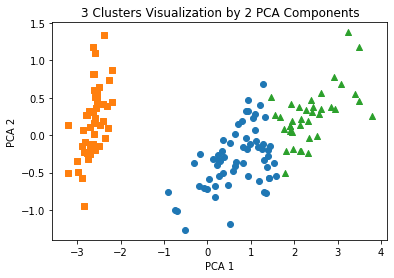

In [9]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

- 클러스터 1을 나타내는 네모는 명확히 다른 군집과 잘 분리됨
- 클러스터0과 클러스터 2를 나타내는 동그라미와 세모의 경우 속성의 위치 자체가 명확히 분리되기 어려운 부분이 존재함

### 군집화 알고리즘 테스트를 위한 데이터 생성

#### 군집화용 데이터 생성기
- make_blobs() API
    - 개별 군집의 중심점과 표준 편차 제어 기능이 추가되어 있음
    - 호출 파라미터 (n_samples=100, n_features=2, centers=3, cluster_std=0.8) p415
    - cluster_std 파라미터로 데이터의 분포도를 조절함. cluster_std 값이 작을수록 군집 중심에 데이터가 모여있음
- make_classification() API
    - 노이즈를 포함한 데이터를 만드는데 유용함
=> 여러 개의 클래스에 해당하는데이터 세트를 만들고, 하나의 틀래스에 여러개의 군집이 분포될 수 있게 데이터 생성 가능, 분류 용도 테스트 데이터  생성 가능
- make_circle(), make_moom() API
    - 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만드는데 사용

In [10]:
#총 200개의 레코드와 2개의 피처가 3개의 군집화 기반 분포도를 가진 피처데이터 세트 X
#동시에 3개의 군집화 값을 가진 타깃 데이터 세트 y
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


- 피처 데이터 세트 X는 200개의 레코드와 2개의 피처를 가지므로 shape은 (200, 2), 군집 타긱 데이터 세트인 y의 shape은 (200,), 그리고 3개의 cluster의 값은 [0, 1, 2]이며 각각 67, 67, 66개로 균일하게 구성됨

In [11]:
#데이터 가공을 편리하게 하기 위해 데이터 세트를 DataFrame으로 변경
#피처의 이름은 'ftr1', 'ftr2'
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


#### make_blob()으로 만든 피처 데이터 세트의 군집화 분포

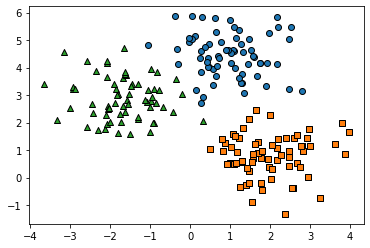

In [12]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

#### 만들어진 데이터 세트에 KMeans 군집화 수행 뒤 군집별로 시각화

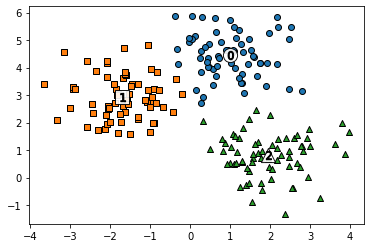

In [13]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X) #X데이터 군집화
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

- make_blobs()의 타깃과 kmenas_label 은 군집 번호를 의미하므로 서로 다른 값으로 매핑될 수 있음(즉, 산점도의 마커가 서로 다를 수 있음)

In [14]:
#매핑 확인
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


- 대부분 잘 매칭되었음

## 02 군집 평가(Cluster Evaluation)
: 군집화가 효율적으로 잘 되었는지 평가함; 대표적인 방법으로 실루엣 분석이 있음

### 실루엣 분석의 개요
#### 실루엣 분석
: 각 군집 간의 거리가 얼마나 효율적으로 분리 되어 있는지를 나타냄
- 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미
- 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어짐
- 실루엣 계수(silhouette coefficient)기반 분석
- 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이토와는 얼마나  멀리 분리돼 있는지를 나타내는 지표

![im2](https://t1.daumcdn.net/cfile/tistory/995D6D455F4346C315)
 
![im3](https://mkjjo.github.io/img/posting/2019-01-09-001-silhoutte.PNG)
- 실루엣 계수는 (-1~ +1) 사이의 값을 가지며 1에 가까워질수록 군집과 멀리 떨어짐
- 0에 가까울수록 근처 군집과 가까워지는 것이며, - 값은 아예 다른 군집에 데이터 포인트가 할당되었음을 뜻함

#### 사이킷런에서 제공하는 실루엣 분석 메서드
- sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds): return 각 데이터 포인트의 실수엣 계수
- sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds): return 전체 데이터의 실루엣 계수 값의 평균값

#### 좋은 군집화의 조건
1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhouette_score()값은 0~1 사이에 값을 가지며 1에 가까워야 함
2. 전체 실루엣 계수의 평균값과 개별 군집의 평균값의 편차가 크지 않아야 함
    - 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않아야함
    
### 붓꽃 데이터 세트를 이용한 군집 평가
: 붓꽃 데이터 세트의 군집화 결과를 실루엣 분석으로 평가


In [1]:
#사이킷런 모듈의 silhouette_samples()과 silhouette_score() 이용
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


- 전체 데이터세트 평균 실루엣값: 0.553

In [2]:
#군집 칼럼별 칼럼의 silhouette_coeff 평균값
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법
#### 전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 된것은 아님
- 특정 군집 내의 실루엣 계수 값만 너무 높고, 다른 군집은 실루엣 계수 값이 낮아도 평균적으로 높은 값을 가질 수 있음(위 실습)
- 따라서 개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐있는 경우 K-평균의 적절한 군집 개수가 설정되었다고 판단

#### 예제
- 여러 개의 군집 개수가 주어졌을 때 이를 분석한 도표를 참고하여 평균 실루엣 계수로 군집 개수를 최적화 하는 방법
주소: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

1. 주어진 데이터에 대해서 군집의 개수 2개를 정했을 때
![im4](https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_001.png)
- For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
- 1번 군집의 모든 데이터는 평균 실루엣 계수 값 이상이지만, 2번 군집의 경우 평균보다 적은 데이터 값이 많음
- 오른쪽 그림을 보면 0번 데이터의 경우 내부 데이터끼리 많이 떨어져 있음

2. 군집의 개수가 3개일 경우
![im5](https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_002.png)
- For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
- 1번, 2번 군집은 평균보다 높은 실루엣 계수를 가지고 있지만 0번 군집은 모두 평균값보다 낮음
- 0번 군집의 경우 내부 데이터 간의 거리가 멀고, 2번 군집과 가깝게 위치하고 있음

3. 군집의 개수가 4개인 경우
![im6](https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_003.png)
- For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
- 이상적인 군집화 개수로 판단할 수 있음

4. 군집의 개수가 5개인 경우
![im7](https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_004.png)
- For n_clusters = 5 The average silhouette_score is : 0.56376469026194

5. 군집의 개수가 6개인 경우
![im8](https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_005.png)
- For n_clusters = 6 The average silhouette_score is : 0.4504666294372765

In [3]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): #군집의 개수를 변화시키면서 K평균 수행 시 개별 군집별 평균 실루엣 계수 값 시각화
    #군집의 개수를 정하는 것에 도움
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

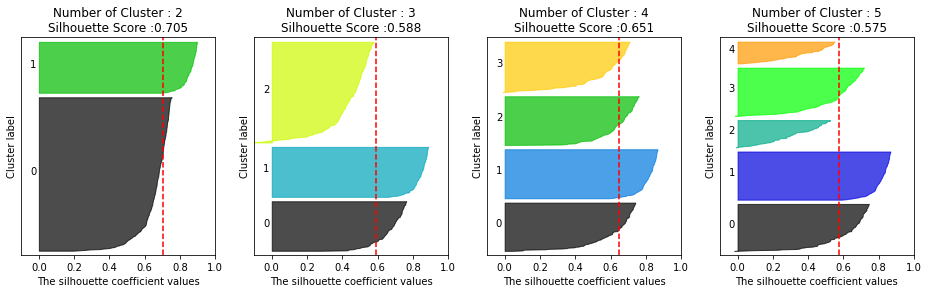

In [4]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

#### 붓꽃 데이터를 이용한 K-평균 최적의 군집 개수 알아보기

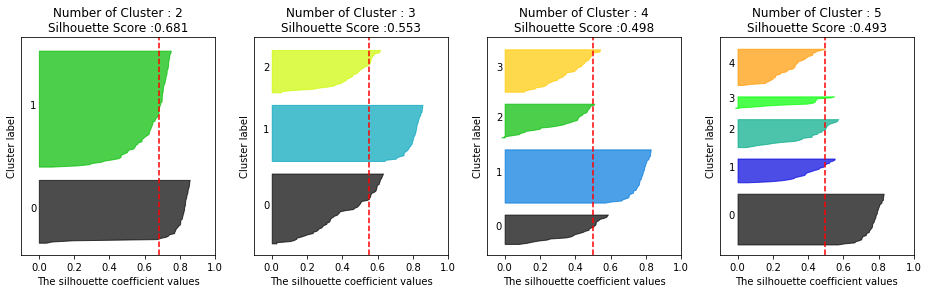

In [5]:
#붓꽃 데이터를 이용한 K-평균 최적의 군집 개수
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

- 실루엣 계수 값, 실루엣 계수 편차를 종합하여 봤을 때 군집의 개수를 2로 하였을 때가 가장 좋아보임

**주의**
- 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로 데이터 양이 늘어나면 수행시간이 크게 늘어남
- 몇 만 건 이상의 데이터에 대해 사이킷런의 실루엣 계수 평가 API를 개인용 PC에서 수행할 경우 메모리 부족 등의 에러가 발생
- 군집별로 임의의 데이터를 샘플링해 실루엣 계수를 평가해야 함


## 03 평균 이동
### 평균 이동(Mean Shift)의 개요
: K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행
   - 중심을 데이터가 모여있는 밀도가 가장 높은 곳으로 이동시킴 
   - 데이터의 분포도를 이용하여 군집 중심점 찾음
   - 확률 밀도 함수(probability density function) 이용
   - 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정하며 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Estimation) 이용
   - 분석 업무 기반의 데이터 세트보다 컴퓨터 비전영역에서 많이 사용됨(이미지만 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적함)
   
![im9](https://t1.daumcdn.net/cfile/tistory/9984393B5F434ADB12)

- 평균 이동 알고리즘은 임의의 포인트에서 시작해 이러한 피크 포인트를 찾을 때까지 KDE를 반복적으로 적용하며 군집화를 수행
- 평균 이동은 K-평균과 다르게 군집의 개수를 지정할 필요가 없으며, 대역폭(h)의 크기에 따라 알고리즘 자체에서 군집의 개수를 최적으로 정함
    - 작은 h 값(h=0.2)은 좁고 뾰족한 KDE를 가짐; 이는 변동성이 큰 방식으로 확률밀도함수를 추정하므로 과적합하기 쉬움
    - 큰 h 값(h=3.0)은 완만한 KDE를 가짐; 이는 과도하게 평활화된 KDE로 인해 단수화된 확률밀도함수를 추정하므로 과소적합하기 쉬움
    - **따라서 대역폭 h를 계산하는 것은 KDE 기반 평균이동 군집화에서 매우 중요함**
- 하지만 이 때문에 대역폭 크기를 어떤 값으로 설정하는가에 따라 군집화의 품질이 결정됨
- 사이킷런의 평균 이동 군집화를 위해 MeanShift 클래스 제공

![im10](https://blog.kakaocdn.net/dn/6ZuS5/btqGFaOTf0z/GIkJCGTOLuHvLnOcvFBY9k/img.png)

#### 장점
- 데이터 세트의 형태를 특정 형태로 가정하거나 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화 가능
- 이상치의 영향력이 크지 않음
- 미리 군집의 개수를 정할 필요가 없음

#### 단점
- 알고리즘의 수행 시간이 오래 걸림
- band-width의 크기에 따른 군집화 영향도가 매우 큼

#### make_blobs() 의 cluster_std를 0.8로 정한 3개 군집의 데이터에 대해 badnwidth를 0.9로 설정한 평균 이동 알고리즘 예제

In [6]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.7, random_state=0)

# bandwidth=0.8
meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


- 군집이 0~5 까지 6개로 분류되었음
- bandwidth 값을 작게 할수록 군집 개수가 많아짐 이를 조정하여 적당한 군집 분류

In [7]:
# bandwidth=1
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [8]:
#최적화된 bandwidth값 반환
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


#### 최적화된 bandwidth로 평균 이동 군집화

In [9]:
import pandas as pd


clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- 3개의 군집으로 군집화

#### 3개의 군집 시각화

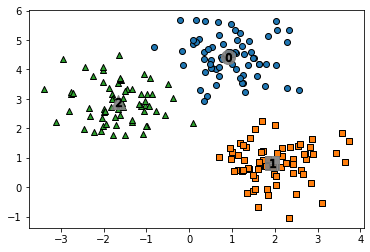

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_ #중심좌표표현
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [11]:
# 타깃값과 군집 라벨 값 비교
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


- 타깃값과 군집 라벨값이 1:1로 잘 매칭되었음

## 04 GMM(Gaussian Mixture Model)
### GMM(Gaussian Mixture Model) 소개

#### GMM군집화
: 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(=정규 분포)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식


*정규분포*
- 평균 μ를 중심으로 높은 데이터 분포도를 가짐
- 좌우 표준편차 1에 전체 데이터의 68.27%, 좌우 표준편차 2에 전체 데이터의 95.45%를 가지고 있음
- 평균이 0 이고, 표준편차가 1인 정규분포를 표준 정규 분포라고 함 
![im11](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcumBnQ%2FbtqKGknJKCf%2FgZCWDk2iOJ9pOY7Z9no3D1%2Fimg.png)

#### 모수 추정
![im12](https://t1.daumcdn.net/cfile/tistory/99BE06425F4351191C)
- 파란색 선: 개별 가우시안 분포, 빨간색선: 합친 가우시안 분포
- GMM은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주함
- 전체 데이터 셋은 위 그림처럼 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성될 수 있음
- 이러한 서로 다른 정규 분포에 기반하여 정규 분포 곡선을 추출하고, 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정함
    - 모수 추정의 대표적인 2가지 추정
    1. 개별 정규 분포의 평균과 분산
    2. 각 데이터가 어떤 정규 분포에 해당되는지에 대한 확률

*이러한 모수 추정을 위해 GMM은 EM(Expectation and Maximization) 방법을 적용함<br>
사이킷런은 GMM의 EM 방식을 통한 모수 추정 군집화를 지원하기 위해 GaussianMixture 클래스를 지원*

#### 장점
- GMM은 K-평균 보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있음

#### 단점
- 군집화를 위한 수행 시간이 오래 걸림

### GMM을 이용한 붓꽃 데이터 세트 군집화
#### 붓꽃 데이터 세트를 이용한 GMM방식과 K-평균 방식 비교
- GMM: 확률 기반 군집화
- K-평균: 거리 기반 군집화

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [2]:
#GaussianMixture 객체의 가장 중요한 초기화 파라미터 n_components 
#n_components 는 Gaussian mixture 모델의 총 개수 #K-평균의 n_clusters 와 같음 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인. 
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


- 타깃 0은 0으로, 타깃 2는 1로 모두 매핑이 잘 되었으나 타깃 1의 경우 클러스터 2와 1로 매핑
- K-평균 군집화 보다 효과적인 분류 결과 도출(붓꽃 데이터 세트에 한함)

In [3]:
# 같은 데이터 셋, K-평균을 통한 군집화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


### GMM과 K-평균의 비교
#### K-평균
- 원형의 범위에서 군집화 수행
- 즉, 개별 군집 내의 데이터가 원형으로 흩어져 있는 경우에 매우 효과적인 군집화
- cluster_std 를 작게 설정하면 데이터가 원형 형태로 분산될 수 있음*(=cluster_std 값이 작을수록 군집 중심에 데이터가 모여있음)*
- 데이터가 길쭉한 타원형으로 늘어선 경우에 군집화를 잘 수행하지 못함

In [5]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수 
#clusterobj: 사이킷런 군집 수행 객체, dataframe: 피처 데이터 세트와 label값을 가진 DataFrame
#label_name: 군집화 결과 시각화일 경우 dataframe 내의 군집화 label 칼럼 명, iscenter: 군집 중심 좌표 제공 여부
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):  
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

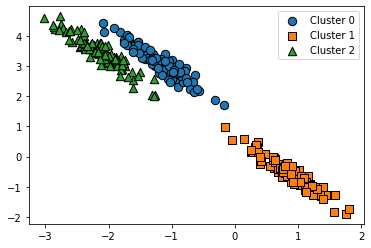

In [8]:
# 만들어진 데이터 세트
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬. 
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

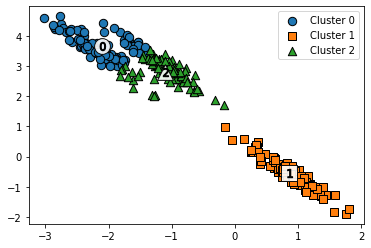

In [11]:
#K-평균 군집화
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용 
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

- K-평균 군집화의 경우 원형 영역 위치로 개별 군집화가 이루어짐
- 즉. K-평균은 평균 거리 기반으로 군집화를 수행하므로 같은 거리상 원형으로 군집을 구성하면서 위와 같은 데이터에 대하여 최적의 군집화를 하기 어려움

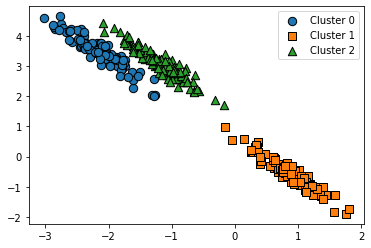

In [9]:
#GMM 군집화
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용 
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

- 데이터가 분포된 방향에 따라 군집화
- GMM은 군집의 중심 좌표를 구할 수 없음

#### K-평균과 GMM 군집화의 효율 비교

In [12]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


- K평균의 경우 군집 1번만 정확하게 매핑되고 나머지는 어긋남
- GMM의 경우 모든 데이터가 군집과 잘 매핑되었음


## 05 DBSCAN
### DBSCAN 개요

####  DBSCAN(Density-based spatial clustering of applications with noise)
: 특정 공간 내에 데이터 밀도 차이, 즉 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 구성하는 방식*(개념설명 교재 p444-445)*
- 밀도 기반 군집화 알고리즘
- 데이터의 분포가 기하학적으로 복잡한 데이터 세트에서도 효과적인 군집화 가능

#### DBSCAN 구성 파라미터
- 입실론 주변 영역(epsilon) : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- 최소 데이터 개수(min points) :개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

#### 데이터 포인트
: 입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족 여부에 따른 포인트 정의
- 핵심 포인트(core point): 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우
- 이웃 포인트(neighbor point): 주변 영역 내에 위치한 타 데이터
- 경계 포인트(border point): 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터
- 잡음 포인트(noise point): 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 포인트로 가지고 있지 않은 데이터


*사이킷런은 DBSCAN 클래스를 통해 DBSCAN 알고리즘을 지원함
DBSCAN 클래스의 초기화 파라미터
eps: 입실론 주변 영역의 반경
min_samples: 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수(자신 데이터 포함)*

### DBSCAN 적용하기 - 붓꽃 데이터 세트


In [13]:
#GMM에서 이용한 붓꽃 데이터 세트
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [14]:
# DBSCAN 클래스를 이용한 붓꽃 데이터 세트 군집화
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean') #일반적으로 eps값은 1 이하로 설정 #eps: 입실론 주변 영역의 반경
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


- 0과 1외에 -1이 군집 레이블로 존재
- 군집 레이블이 -1인 것은 노이즈에 속하는 군집을 의미함
- 따라서 붓꽃 데이터 세트는 DBSCAN에서 0과 1인 두 개의 군집으로 군집화
- 타깃값의 유형이 3가지이나, 군집이 2개로 되었다고 군집화 효율이 떨어지는 것은 아님

#### DBSCAN 군집화 시각화

In [15]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1: #a[-1]은 문자열에서와 마찬가지로 리스트 a의 마지막 요솟값
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend) #따라서 노이즈 markers[-1] 은 별모양
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

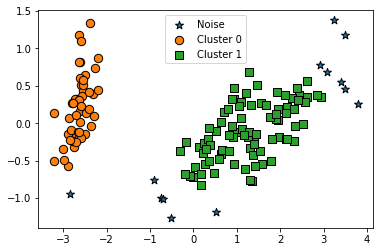

In [16]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- 별로 표시된 값은 모두 노이즈
- DBSCAN을 적용할 때는 특정 군집 개수로 군집을 강제하지 않는 것이 좋음
- eps 값을 크게하면 반경이 커져 포함하는 데이터가 많아져 노이즈 데이터 개수가 작아짐
- min_samples 값을 크게하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커지게 됨
  (데이터 밀도가 더 커져야 하기 때문에, 매우 촘촘한 데이터 분포가 아닌 경우 노이즈로 인식함)
  
#### eps 변화 예제

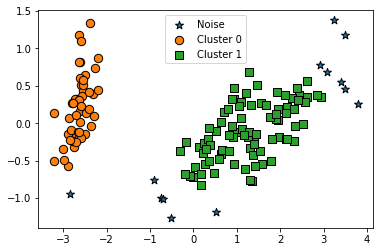

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


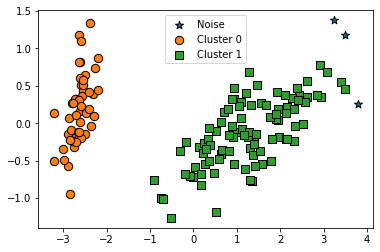

In [17]:
# eps를 0.6에서 0.8로 증가시키면 노이즈 데이터 수가 줄어든다
# eps = 0.6
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

from sklearn.cluster import DBSCAN
# eps = 0.8
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- 노이즈 군집인 -1이 3개만 존재
- eps = 0.6 일때 노이즈로 분류된 데이터가 eps 반경이 커지면서(eps = 0.8) 군집 1에 속하게 됨

#### min_samples변화 예제

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


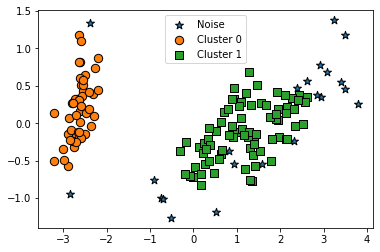

In [18]:
# eps는 기존 0.6이며, min_samples를 8에서 16으로 증가시킴
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- 노이즈 데이터가 기존보다 증가함

### EBSCAN 적용하기 - make_circles() 데이터 세트
- 복잡한 기하학적 분포를 가지는데이터 세트에 대해 DBSCAN과 타 알고리즘 비교


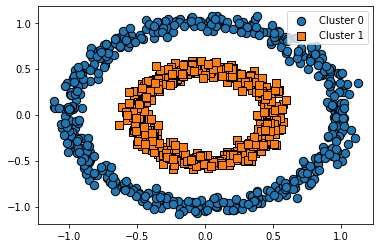

In [19]:
#make_circles() 함수는 오직 2개의 피처만을 생성
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5) #noise는 노이즈 데이터 세트의 비율
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2']) #factor는 외부 원과 내부 원의 scale 비율
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

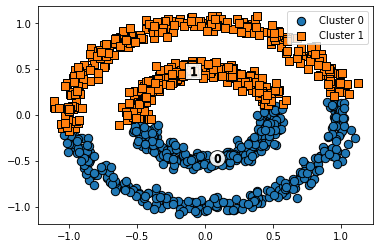

In [20]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

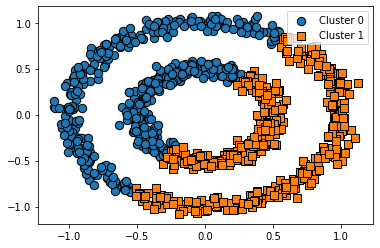

In [21]:
# GMM으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

- K-평균의 경우 위-아래 군집 중심을 기반으로 위와 아래로 절반 형태로 군집화가 됨
- 거리 기반 군집화로는 위와 같은 데이터에서 특정한 형태로 지속해서 이어지는 부분을 찾아내기 어려움

- GMM의 경우도 마찬가지로 군집화가 원하는 방향으로 이루어지지 않았음

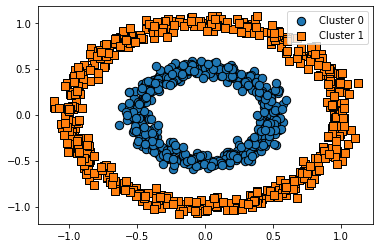

In [22]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

- DBSCAN 으로 군집화 적용시 원하는 방향으로 정확히 군집화가 되었음

## 06 군집화 실습 - 고객 세그먼테이션
### 고객 세그먼테이션의 정의와 기법

#### 고객 세그먼테이션(Customer Segmentation)
: 다양한 기준으로 고객을 분류하는 기법으로 CRM이나 마케팅의 중요 기반 요소임

고객 분류 요소
- 지역/결혼여부/성별/소득 등 개인의 신상 데이터
- 얼마나 많은 매출을 발생하는가

목표
- 타깃 마케팅; 고객을 여러 특성에 맞게 세분화하여 그 유형에 따라 맞춤형 마케팅잉나 서비스를 제공

#### RFM 기법: 기본적인 고객 분석 요소
- Recency(R): 가장 최근 상품 구입일에서 오늘까지의 시간
- Frequency(F): 상품 구매 횟수
- Monetary Value(M): 총 구매 금액

### 데이터 세트 로딩과 데이터 클렌징
제품 주문 데이터 세트<br>
주소: http://archive.ics.uci.edu/ml/datasets/online+retail

- InvoiceNo: 주문번호. 'C'로 시작하는 것은 취소 주문
- StockCode: 제품 코드
- Description: 제품 설명
- Quantity: 주문 제품 건수
- InvoiceDate: 주문 일자
- UnitPrice: 제품 단가
- CustomerID: 고객 번호
- Country: 국가명

In [4]:
pip install openpyxl

  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8913 sha256=8f5fac524036accacbd1ec8535171e108dc454e068c8b73ac8f43a10f645be53
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\6e\df\38\abda47b884e3e25f9f9b6430e5ce44c47670758a50c0c51759
Successfully built et-xmlfile
Note: you may need to restart the kernel to use updated packages.


In [5]:
# 데이터세트 DataFrame으로 로드
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel(io='Online Retail.xlsx', engine='openpyxl')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [6]:
#데이터 세트의 전체 건수, 칼럼 타입, Null의 개수 확인
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- 전체 데이터: 541909
- CustomerI: Non-Null = 406829 로 Null 값이 많음
- 오류 데이터가 존재 => 사전 정제 작업 필요
    - Null 데이터 제거 => 고객 식별 데이터(ID)가 없는 데이터 삭제
    - 오류 데이터 삭제 => Quantity(반환데이터), UnitPrice가 0보다 작은 경우 삭제
 

In [7]:
# 불린 인덱싱 적용하여 필터링
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

- 전체 데이터수: 397884

In [8]:
# 주문 고객 국가 확인 후 대다수를 차지하는 영국을 제외하고 다른 국가의 데이터 모두 삭제
retail_df['Country'].value_counts()[:5]

retail_df = retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape) #최종데이터

(354321, 8)


### RFM 기반 데이터 가공
- 해당 온라인 판매 데이터 세트는 주문 횟수와 주문 금액이 압도적으로 **특정 고객**에게 많은 특성을 가지고 있음
- 개인 고객의 주문과 **소매점**의 주문이 함께 포함되어 있기 때문

In [9]:
#UnitPrice와 Quantity를 곱하여 주문 금액 데이터 생성
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int) #float 타입에서 int 타입으로 변경

In [10]:
#Top-5 주문 건수와 주문 금액을 가진 고객 데이터 추출
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [11]:
#InvoiceNo + StockCode로 Group by 수행시 거의 1에 가깝게 유일한 식별자 레벨이 됨
retail_df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

고객 레벨로 주문 기간, 주문 횟수, 주문 금액 데이터를 기반으로 해 RFM 기반의 고객 세그먼테이션 수행
- 주문번호+상품코드 기준의 데이터를 고객 기준의 Recency, Frequency, Monetary Value 데이터로 변경
- 이를 위해서는 주문 번호 기준의 데이터를 개별 고객 기준의 데이터로 group by 해야함


In [12]:
# DataFrame의 groupby() 의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 컬럼의 max() 에서 데이터 가공
# Frequency는 InvoiceNo 컬럼의 count() , Monetary value는 sale_amount 컬럼의 sum()
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount':'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


In [13]:
#2011년 12월 10일을 현재 날짜로 간주하고 가장 최근의 주문 일자를 뺀데이터에서 일자 데이터만 추출하여 생성
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 컬럼 건수는 ',cust_df.shape)
cust_df.head(3)

cust_df 로우와 컬럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


### RFM 기반 고객 세그먼테이션
- 온라인 판매 데이터 세트는 소매업체의 대규모 주문을 포함하고 있기 때문에 왜곡된 데이터 분포도를 가짐 => 한쪽 군집에 집중된 군집화
- 왜곡된 데이터 분포도에서 군집화를 수행하면 어떤 형상이 발생하는가

(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <BarContainer object of 10 artists>)

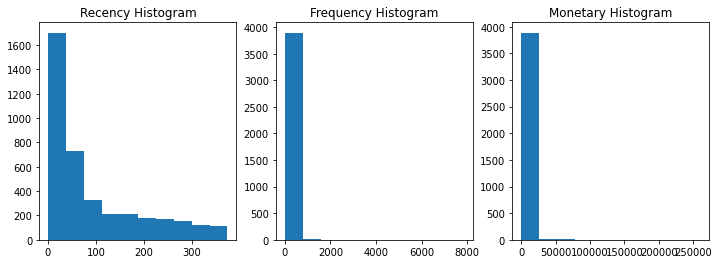

In [14]:
#각 칼럼 분포도 알아보기
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

- Recency, Frequency, Monetary 모두 왜곡된 데이터 값 분포도를 가지고 있음

In [15]:
# 각 칼럼의 데이터 값 백분위 분포
cust_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


In [39]:
# StandardScaler로 평균과 표준편차를 재조정 후 K-평균 수행
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.592


In [40]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [41]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
 
    plt.show()

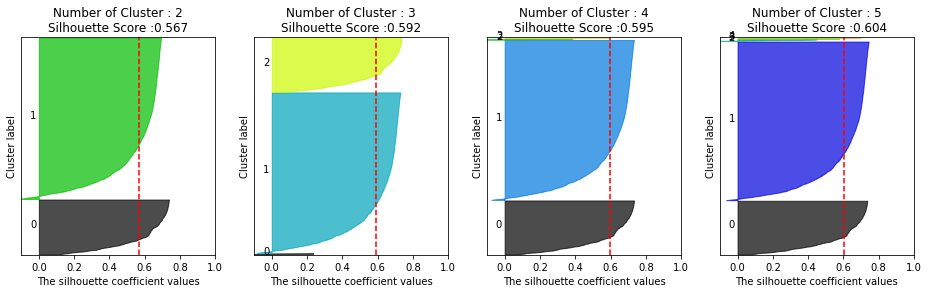

In [45]:
visualize_silhouette([2,3,4,5],X_features_scaled)
#visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

In [22]:
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.303


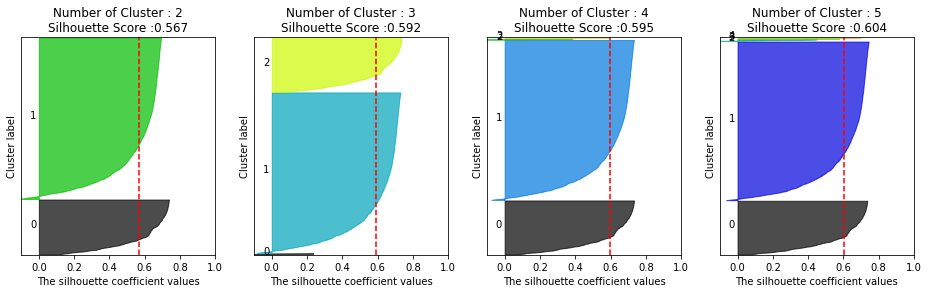

In [44]:
visualize_silhouette([2,3,4,5],X_features_scaled)
#visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)